In [1]:
import pandas as pd

### Используя параметры pandas прочитаем красиво пандас

In [2]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv("UCI_Credit_Card.csv")

#### Выведем первые 5 записей

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#### Изучим типы данных файла

In [4]:
# (2) выведите, что за типы переменных, сколько пропусков,
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

#### Посмотрим основные статистики  для некоторых числовых данных

In [5]:
# для численных значений посчитайте пару статистик (в свободной форме))
print(df.loc[:,['LIMIT_BAL','AGE','SEX','MARRIAGE']].describe())

            LIMIT_BAL           AGE           SEX      MARRIAGE
count    30000.000000  30000.000000  30000.000000  30000.000000
mean    167484.322667     35.485500      1.603733      1.551867
std     129747.661567      9.217904      0.489129      0.521970
min      10000.000000     21.000000      1.000000      0.000000
25%      50000.000000     28.000000      1.000000      1.000000
50%     140000.000000     34.000000      2.000000      2.000000
75%     240000.000000     41.000000      2.000000      2.000000
max    1000000.000000     79.000000      2.000000      3.000000


#### Сосчитаем число женщин с университетским образованием

In [6]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

#TODO
df[(df['SEX'] == 2 )&( df['EDUCATION'] == 2)]['ID'].count()

8656

#### Сгрупируем  данные по "default payment next month" и сосчитаем медианы признаков начинающихся на BILL_ и PAY_

In [7]:
# (4) Сгрупировать по "default payment next month" и 
#посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO
bill = df.columns.str.startswith('BILL_') #условие 1
pay = df.columns.str.startswith('PAY_')#условие 2
df_b_p = list(df.columns[bill ^ pay]) #маска
df.groupby('default.payment.next.month')[df_b_p].median()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1,0,0,0,0,0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


#### Сводная таблица по SEX, EDUCATION, MARRIAGE

In [8]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

pd.pivot_table(data = df, index = ['SEX','EDUCATION','MARRIAGE'])

AGE      BILL_AMT1      BILL_AMT2  \
SEX EDUCATION MARRIAGE                                            
1   0         1         41.000000   11612.500000    4326.000000   
              2         36.500000   11051.666667   11051.666667   
    1         0         37.000000     298.000000     750.000000   
              1         42.423077   60196.886391   56841.282840   
              2         31.704899   54064.399164   52811.889480   
              3         44.533333   64661.733333   60919.266667   
    2         0         38.000000     176.000000     252.000000   
              1         40.332489   56465.218143   54125.950211   
              2         31.584354   50926.275850   48499.191837   
              3         40.698413   35491.222222   32247.698413   
    3         0         38.000000   26227.916667   31324.000000   
              1         44.338740   55910.685115   52443.879771   
              2         35.379195   45000.682327   43400.732662   
              3         47.722222   38469.972222   36403.472222   
    4         1         41.777778   76830.777778   60217.833333   
              2         28.173913   64118.739130   56253.086957   
              3         27.000000    3462.000000    1147.000000   
    5         1         39.354167  104611.791667   99782.916667   
              2         32.630435   74828.086957   70983.934783   
              3         44.000000   40199.000000   39218.000000   
    6         1         48.000000   78274.500000   67747.071429   
              2         40.363636   37394.545455   38328.818182   
2   0         1         37.500000   22374.500000   23274.000000   
              2         42.000000    7662.250000    4821.000000   
    1         0         36.333333    3148.666667    1785.333333   
              1         38.870571   44337.774114   43080.453248   
              2         30.158046   43004.106082   41783.862787   
              3         38.150000   55192.750000   41806.850000   
    2         0         35.800000   31881.400000   35419.200000   
              1         37.527504   54135.562835   51873.166145   
              2         30.405637   53866.076961   51843.868873   
              3         40.868687   43196.595960   40408.939394   
    3         0         38.218750   19299.093750   22961.125000   
              1         42.356315   45768.902372   44013.479316   
              2         36.240394   46695.179310   44834.025616   
              3         46.059701   35120.835821   34891.492537   
    4         1         37.941176   36574.382353   34017.352941   
              2         30.355556   58092.511111   50716.133333   
              3         40.500000     442.500000     649.000000   
    5         1         37.725490   79611.725490   75950.607843   
              2         32.234568   73882.592593   63430.012346   
              3         37.500000  121721.000000  114733.000000   
    6         1         45.000000   85957.571429   85063.785714   
              2         40.900000  111611.000000  110975.700000   
              3         42.000000  181866.000000  160283.000000   

                            BILL_AMT3      BILL_AMT4     BILL_AMT5  \
SEX EDUCATION MARRIAGE                                               
1   0         1           7871.000000   20295.500000   1926.500000   
              2          17312.500000   10767.333333   7372.166667   
    1         0            179.000000    1576.000000    497.000000   
              1          55180.526036   51360.938462  48348.436095   
              2          49665.841246   46617.539309  42545.724269   
              3          60893.433333   57469.500000  52784.100000   
    2         0              0.000000       0.000000      0.000000   
              1          51740.359494   47514.228270  44393.006329   
              2          45166.255782   41269.722449  37845.888435   
              3          32142.619048   25978.333333  21556.095238   
    3         0          18821.583333   

In [9]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

#TODO
df['LIMIT_BAL_NEW'] = df['LIMIT_BAL'].apply(lambda x: 'A' if x < 10000 
                                                        else ('B' if (x<=100000) & (x>10000) 
                                                        else ('C' if (x<=200000) & (x>100000) 
                                                        else ('D' if (x<=400000) & (x>200000)
                                                        else ('E' if (x<=700000) & (x>400000)
                                                        else  'F')))))


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

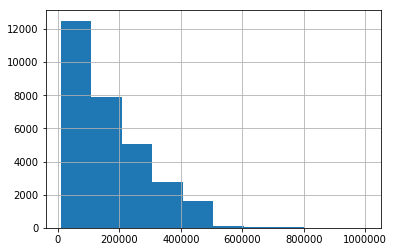

In [12]:
df.LIMIT_BAL.hist()

Text(0.5,1,'Кредитный лимит у мужчин и женщин в зависимости от образования v.1')

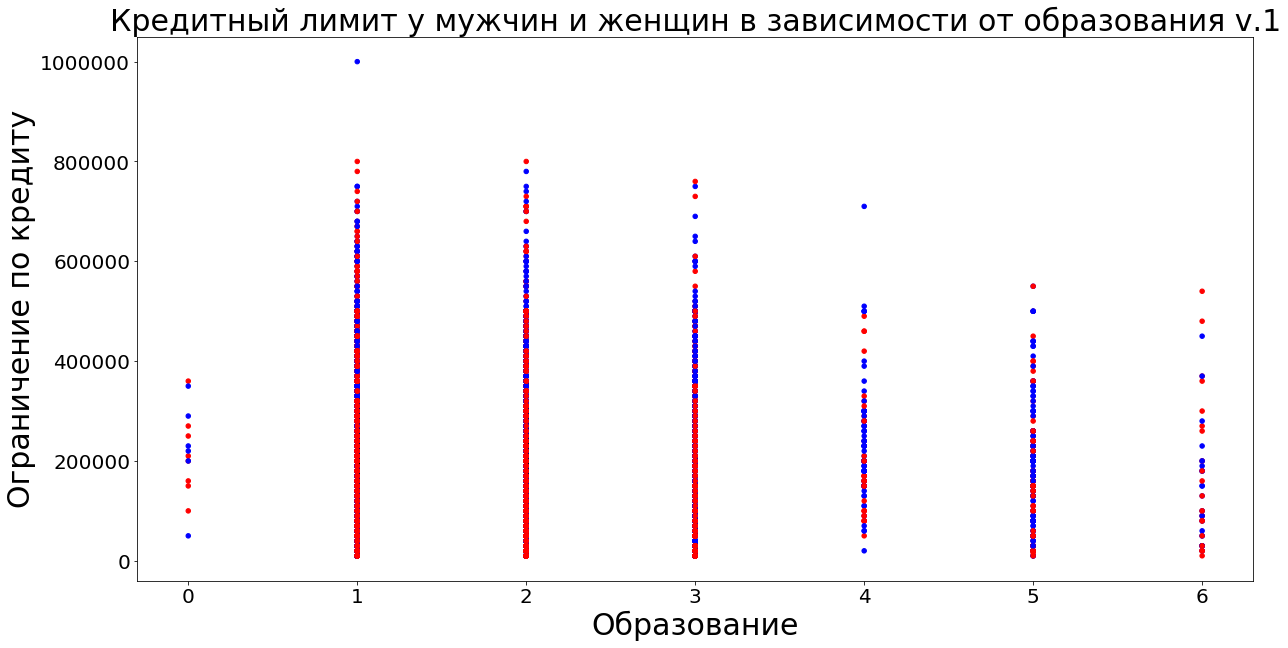

In [13]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)
import numpy as np
_, ax = plt.subplots(figsize=(20,10))
df.plot(kind='scatter',x='EDUCATION',y='LIMIT_BAL',color=df.SEX.map({1:'red',2:'blue'}),ax = ax)
plt.xlabel('Образование',fontsize=30)
plt.ylabel('Ограничение по кредиту',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Кредитный лимит у мужчин и женщин в зависимости от образования v.1',fontsize=30)

Text(0.5,1,'Кредитный лимит у мужчин и женщин в зависимости от образования v.2')

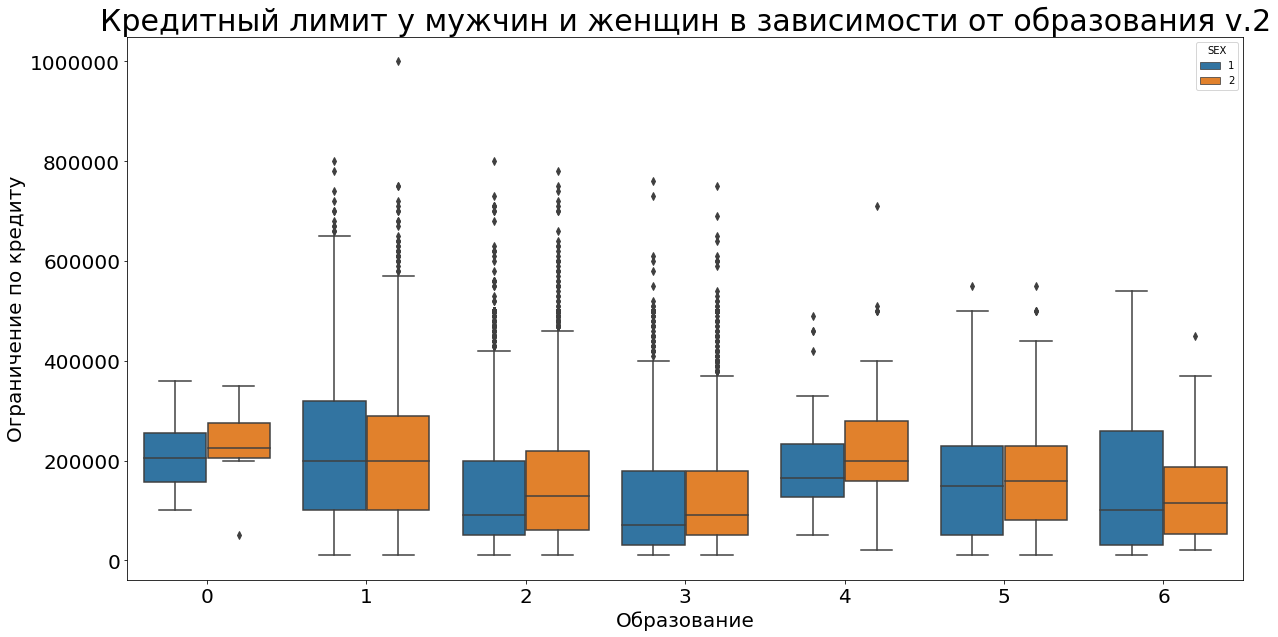

In [14]:
_, ax = plt.subplots(figsize=(20,10))
sns.boxplot(y=df.LIMIT_BAL, x=df.EDUCATION, hue = df.SEX)
plt.xlabel('Образование',fontsize=20)
plt.ylabel('Ограничение по кредиту',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Кредитный лимит у мужчин и женщин в зависимости от образования v.2',fontsize=30)

Text(0.5,1,'Кредитный лимит у женщин в зависимости от образования v.1')

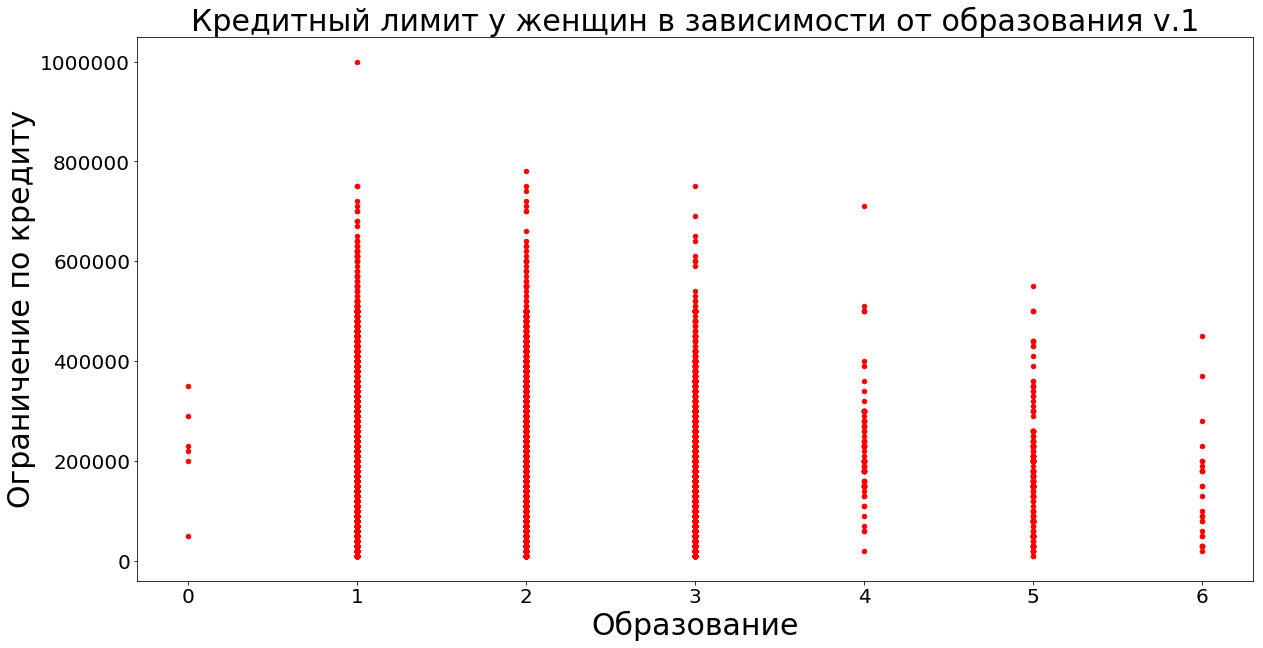

In [15]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

#TODO
df_sort = df[df['SEX']==2]
_, ax = plt.subplots(figsize=(20,10))
df_sort.plot(kind = 'Scatter',x='EDUCATION',y='LIMIT_BAL',color='red',ax = ax)
plt.xlabel('Образование',fontsize=30)
plt.ylabel('Ограничение по кредиту',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Кредитный лимит у женщин в зависимости от образования v.1',fontsize=30)

In [16]:
##### (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)

#TODO
#сделаем df без последнего столбца и первого
df_wl  = df.iloc[:,1:-1]
columns_list = df_wl.columns.tolist()
len(columns_list)

24

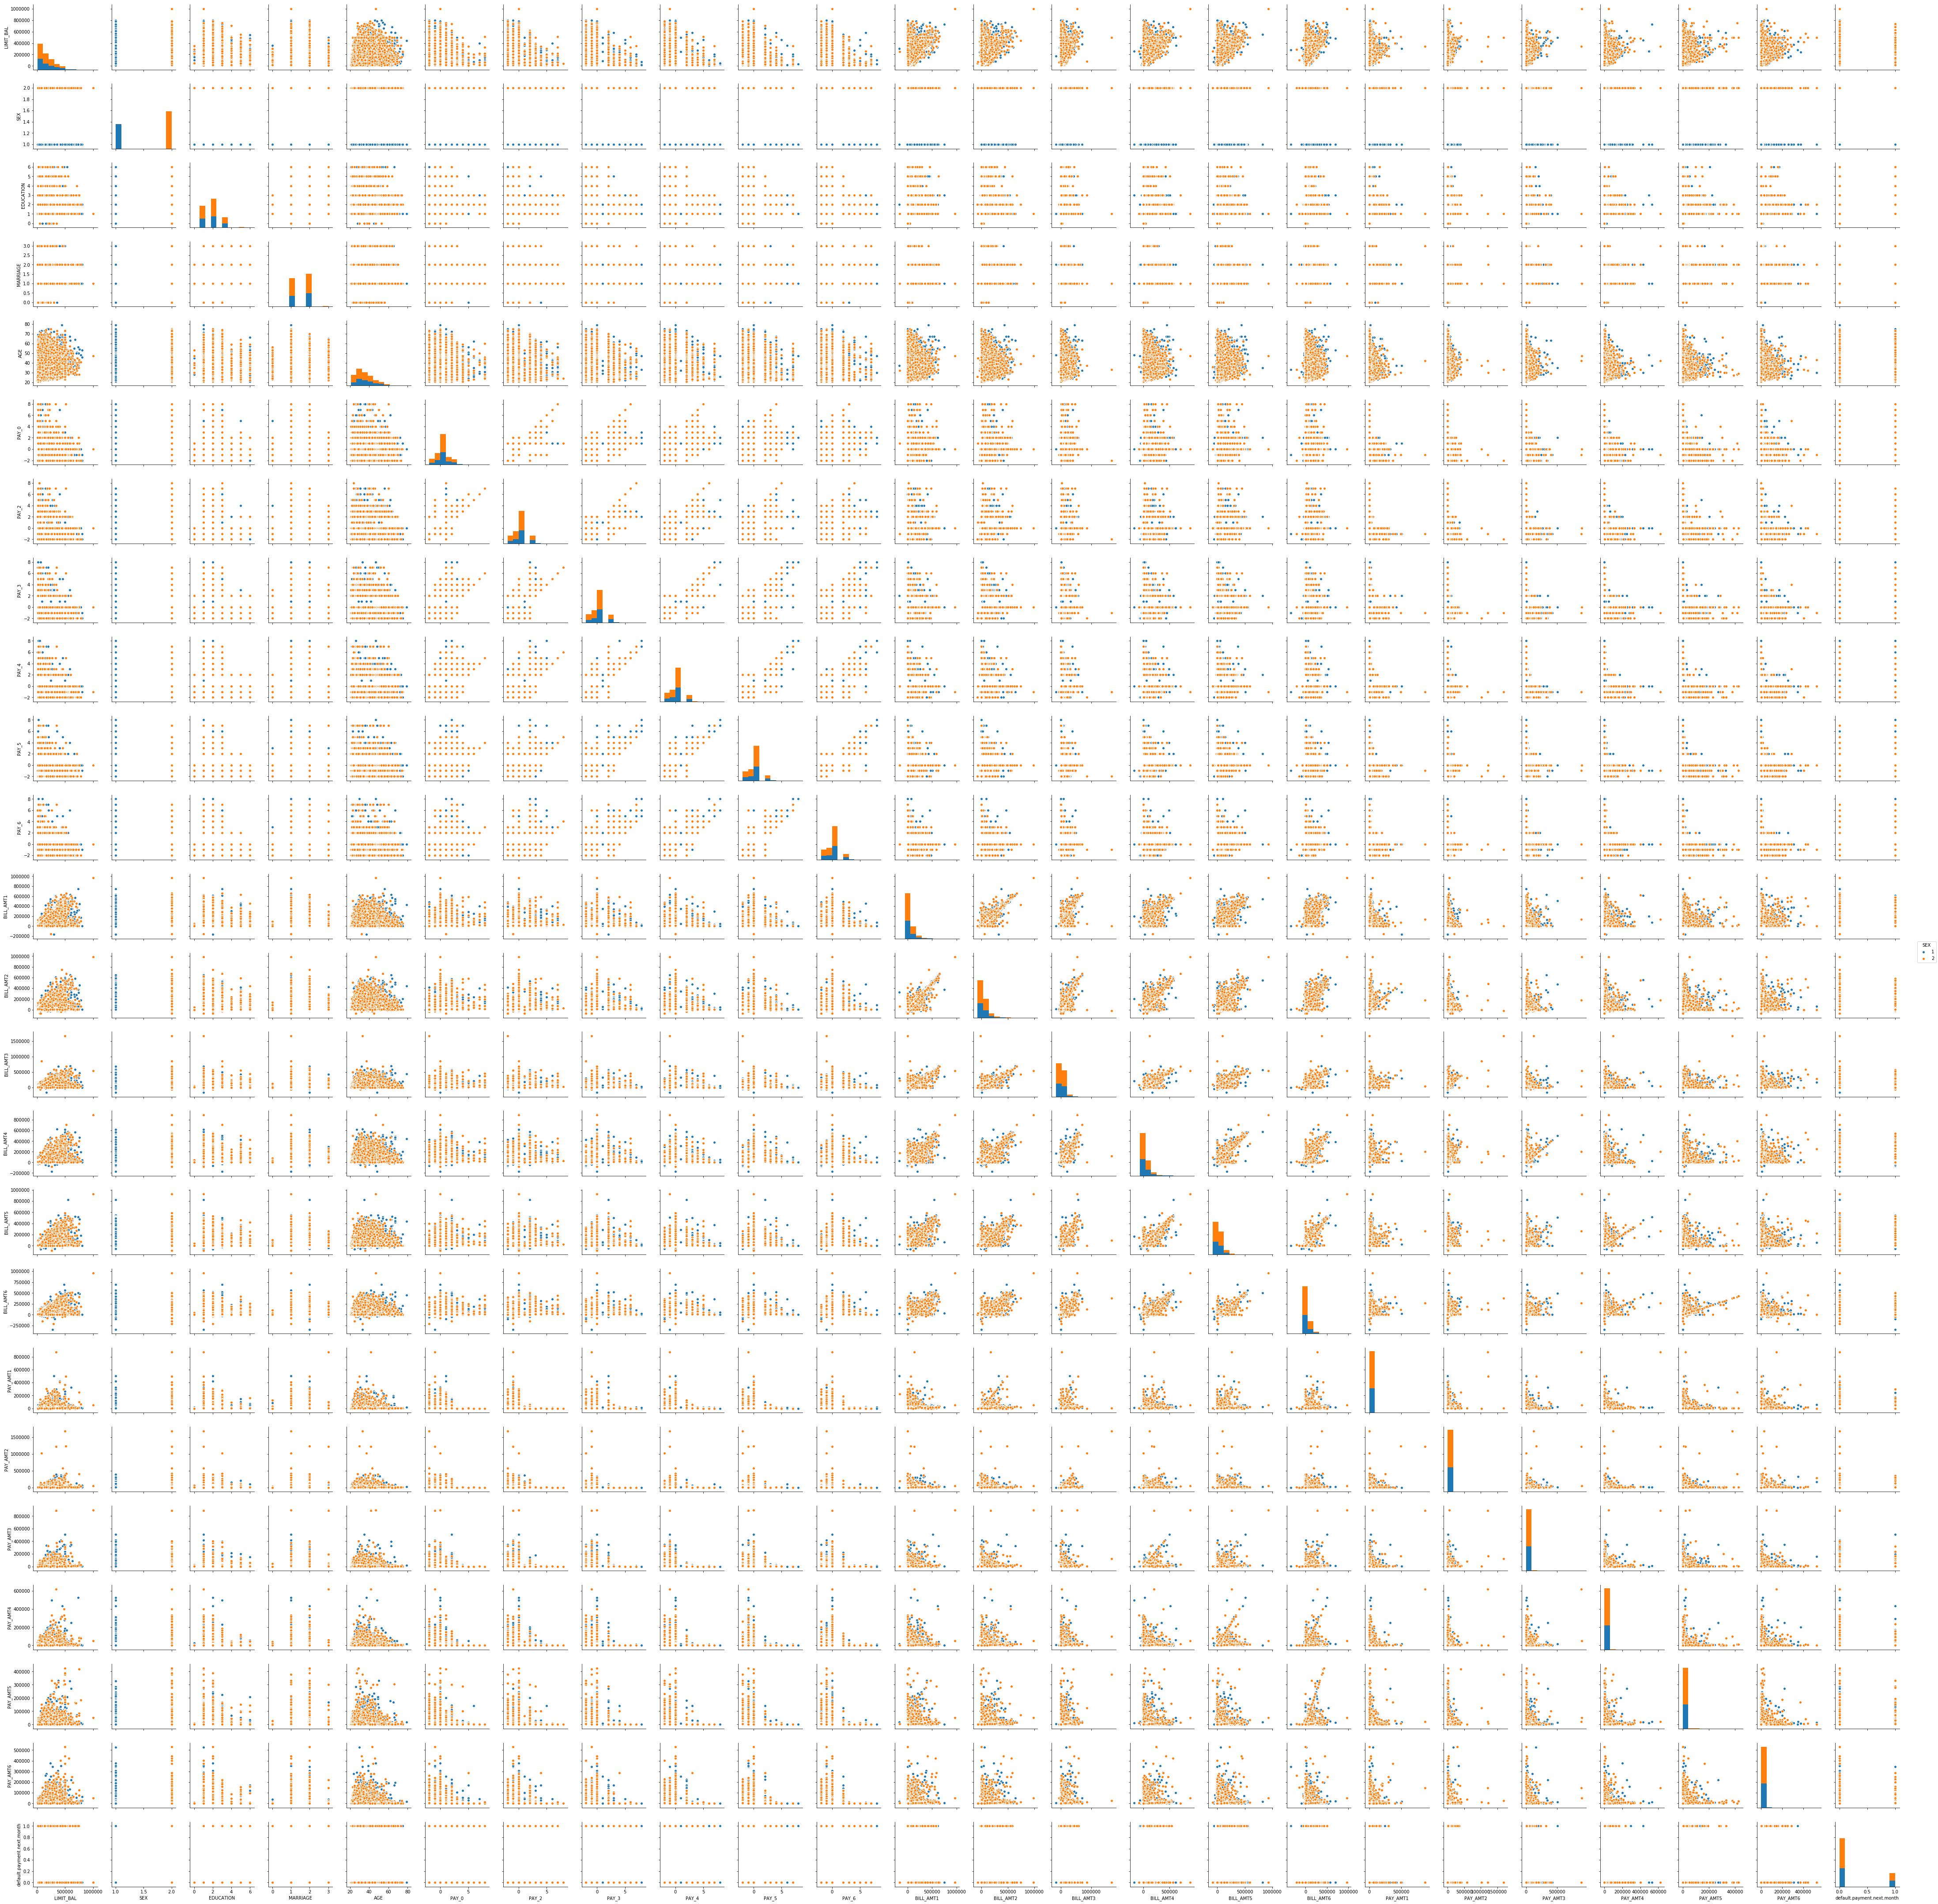

In [17]:
plt.figure(figsize = (100,100))
sns.pairplot(df_wl,hue = 'SEX')